In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def Gauss(m,v,x):
    """
    Gaussian function
    Needs numpy as np
    Input: mean and variance
    Output: Gaussian that meets the description at position x
    """
    return np.exp(-(x-m)**2/(2*v))/(np.sqrt(2*np.pi*v))
def lGauss(m,v,x):
    """
    Gaussian function
    Needs numpy as np
    Input: mean and variance
    Output: Log( Gaussian that meets the description at position x )
    """
    return (-(x-m)**2/(2*v))-np.log((np.sqrt(2*np.pi*v)))

In [3]:
def Integrate(f, low, up, N, pxi, xi, px, pygx, lpygx, x, SNR, Gauss, lGauss):
    """
    Integrate a function using trapezoidal rule
    Needs numpy as np
    Input: function to be integrated, lower bound, upper bound, number of increments
    Output: Result of integration (must be a number)
    """
    pts = np.linspace(low, up, N)
    sums = 0
    for pt in pts:
        sums = sums + f(pt, pxi, xi, px, pygx, lpygx, x, SNR, Gauss, lGauss)
    sums = sums - f(low, pxi, xi, px, pygx, lpygx, x, SNR, Gauss, lGauss)/2 - f(up, pxi, xi, px, pygx, lpygx, x, SNR, Gauss, lGauss)/2
    sums = sums*(up-low)/N
    return sums

In [4]:
def pygx(yi, xi, SNR, Gauss):
    """
    Assumes AWGN out from input x
    Needs numpy as np
    Input: x value
    Output: probabilty of y given x in y
    """
    v = 10**(-SNR/10)
    return Gauss(xi,v,yi)
def lpygx(yi, xi, SNR, lGauss):
    """
    Assumes AWGN out from input x
    Needs numpy as np
    Input: x value
    Output: log( probabilty of y given x in y )
    """
    v = 10**(-SNR/10)
    return lGauss(xi,v,yi)

In [5]:
def f(yi, pxi, xi, px, pygx, lpygx, x, SNR, Gauss, lGauss):
    """
    Function to be integrated
    Needs numpy as np
    Input: component of function
    Output: output of the function at a certain point
    """
    den = 0
    for j in range(len(px)):
        den = den + px[j]*pygx(yi, x[j], SNR, Gauss)
    lpygxi = lpygx(yi, xi, SNR, lGauss)
    pygxi = pygx(yi, xi, SNR, Gauss)
    return pxi*pygxi*(lpygxi-np.log(den))/np.log(2)

In [6]:
def MI_disc_cont(x, px, pygx, lpygx, Integrate, low, up, N, SNR, Gauss, lGauss):
    """
    Mutual information
    Needs numpy as np
    Input: x discrete, y continuous, z continuous
    Outputs: value of mutual information
    """
    insum = 0
    for i in range(len(x)):
        insum = insum + Integrate(f, low, up, N, px[i], x[i], px, pygx, lpygx, x, SNR, Gauss, lGauss)
    return insum

[0.05962943 0.07894931 0.10192829 0.12887526 0.16037786 0.19728699
 0.24053115 0.29087097 0.34870144 0.41390406 0.48570116 0.56250674
 0.64182757 0.72030056 0.79395624 0.85876449 0.91142451 0.95020577
 0.97549198 0.98966851 0.99625795 0.99868468 0.99935399 0.99948292
 0.99949883 0.99949996 0.9995     0.9995     0.9995     0.9995
 0.9995    ]


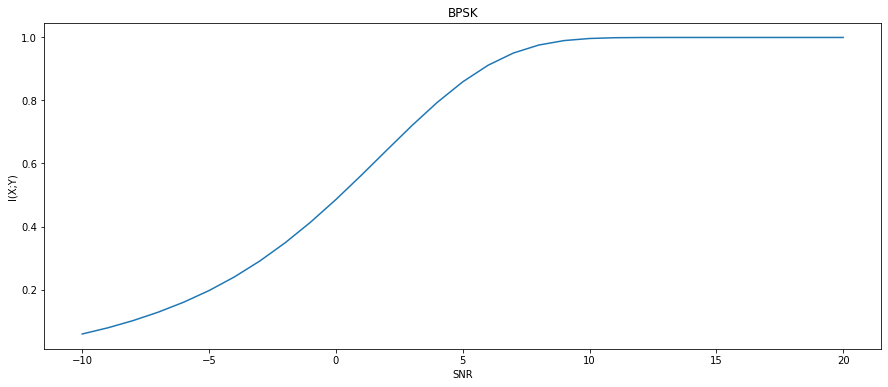

In [7]:
x = np.array([-1, 1])
px = np.array([0.5, 0.5])
N = 2000
k = np.linspace(-10, 20, 31)
I = np.zeros(len(k))
for l in range(len(k)):
    up = 4.5 + 0.1*(20-k[l])
    low = -4.5 - 0.1*(20-k[l])
    I[l] = MI_disc_cont(x, px, pygx, lpygx, Integrate, low, up, N, k[l], Gauss, lGauss)
print(I)
plt.figure(figsize=(15,6))
plt.plot(k,I)
plt.title("BPSK")
plt.xlabel("SNR")
plt.ylabel("I(X;Y)")
plt.show()

[0.05907483 0.0783058  0.10129306 0.12837067 0.16011125 0.19733833
 0.2410064  0.29201925 0.35107644 0.41858484 0.49462313 0.57894456
 0.6710202  0.77012278 0.87542776 0.98609038 1.10126587 1.22004148
 1.34119707 1.46270937 1.58118061 1.691736   1.78880799 1.86759383
 1.92554865 1.96328372 1.984403   1.99419845 1.99779625 1.99878527
 1.998975  ]


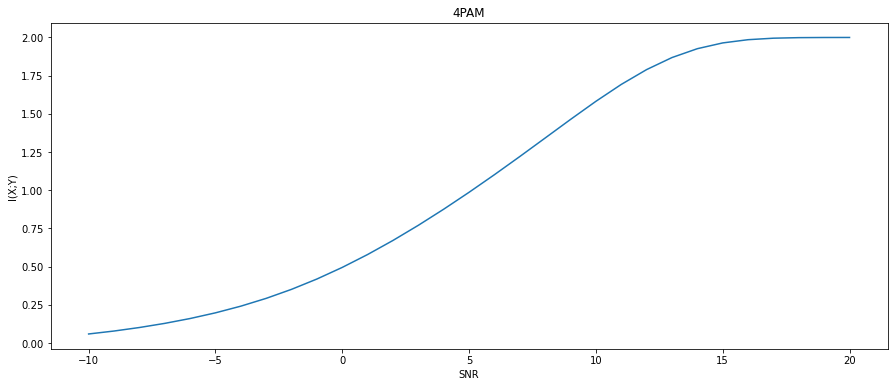

In [67]:
x = np.array([-3/np.sqrt(5), -1/np.sqrt(5), 1/np.sqrt(5), 3/np.sqrt(5)])
px = np.array([0.25, 0.25, 0.25, 0.25])
N = 2000
k = np.linspace(-10, 20, 31)
I = np.zeros(len(k))
for l in range(len(k)):
    up = 4.5 + 0.1*(20-k[l])
    low = -4.5 - 0.1*(20-k[l])
    I[l] = MI_disc_cont(x, px, pygx, lpygx, Integrate, low, up, N, k[l], Gauss, lGauss)
print(I)
plt.figure(figsize=(15,6))
plt.plot(k,I)
plt.title("4PAM")
plt.xlabel("SNR")
plt.ylabel("I(X;Y)")
plt.show()

[0.05896981 0.07818114 0.10116459 0.12825961 0.16003782 0.19731786
 0.24105373 0.29216203 0.35137385 0.41914832 0.49563789 0.58069037
 0.67388677 0.77461506 0.8821641  0.99580866 1.1148627  1.23869916
 1.36674978 1.49849781 1.63346904 1.77122124 1.91132793 2.05332895
 2.19654129 2.33954609 2.47939909 2.61118911 2.72867406 2.82593774
 2.89928053]


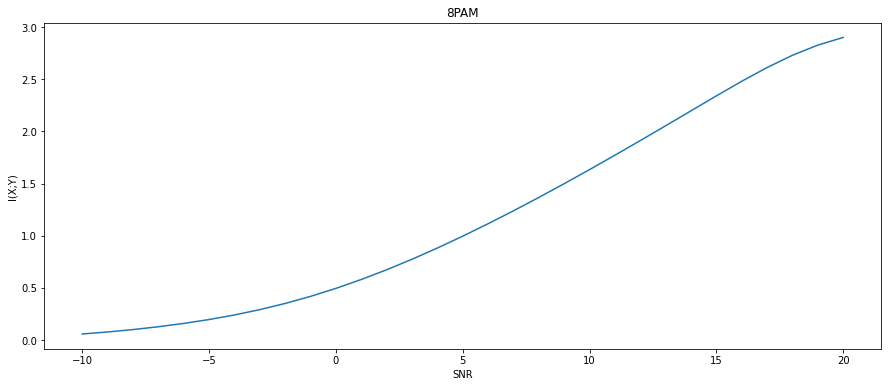

In [7]:
x = np.array([-7/(np.sqrt(21)), -5/(np.sqrt(21)), -3/(np.sqrt(21)), -1/(np.sqrt(21)),
              1/(np.sqrt(21)), 3/(np.sqrt(21)), 5/(np.sqrt(21)), 7/(np.sqrt(21))])
px = np.array([1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8])
N = 2000
k = np.linspace(-10, 20, 31)
I = np.zeros(len(k))
up = 5
low = -5
for l in range(len(k)):
    up = 4.5 + 0.1*(20-k[l])
    low = -4.5 - 0.1*(20-k[l])
    I[l] = MI_disc_cont(x, px, pygx, lpygx, Integrate, low, up, N, k[l], Gauss, lGauss)
print(I)
plt.figure(figsize=(15,6))
plt.plot(k,I)
plt.title("8PAM")
plt.xlabel("SNR")
plt.ylabel("I(X;Y)")
plt.show()

[0.06875176 0.08553457 0.10612237 0.13123235 0.16164966 0.19820458
 0.24173748 0.29305196 0.35285953 0.42172191 0.5        0.58781832
 0.68505233 0.79134118 0.9061231  1.0286866  1.15822809 1.29390719
 1.43489361 1.58040221 1.72971581 1.88219718 2.03729262 2.19452948
 2.35351013 2.51390384 2.67543808 2.83788995 3.00107822 3.16485623
 3.32910574]


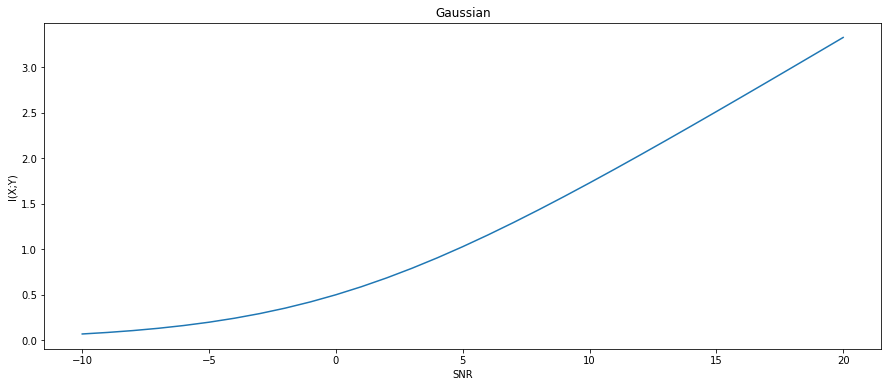

In [21]:
k = np.linspace(-10, 20, 31)
v = 10**(-k/10)
I = np.zeros(len(k))
for l in range(len(k)):
    I[l] = 0.5 * np.log(1 + 1/v[l]) / np.log(2)
print(I)
plt.figure(figsize=(15,6))
plt.plot(k,I)
plt.title("Gaussian")
plt.xlabel("SNR")
plt.ylabel("I(X;Y)")
plt.show()

In [27]:
f(-1, 0.5, 1, px, pygx, lpygx, x, 0.18, Gauss, lGauss)

-2.9828501261543345


-0.05410149468844269

In [28]:
lpygx(-1, 1, 0.18, lGauss)

-2.9828501261543345

In [17]:
pa = 0.01
pb = 0.5-pa
a = 0.05
b = np.sqrt((0.5-pa*a**2)/(0.5-pa))
print(b)
print(pa*a**2+pb*b**2)
x = np.array([-b,-a,a,b])
px = np.array([pb,pa,pa,pb])
v = 0.9578
SNR = -10*np.log(v)/np.log(10)
SNR = -10
print(SNR)
MI_disc_cont(x, px, pygx, lpygx, Integrate, low, up, N, SNR, Gauss, lGauss)

3.158718094417418
0.5
5


0.5621271646108129